# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545


El cáncer representa una de las principales causas de muerte a nivel mundial, y su impacto se extiende a todas las regiones, incluyendo México. Según la Organización Mundial de la Salud (OMS), en 2020 se registraron aproximadamente 19.3 millones de nuevos casos de cáncer y 10 millones de muertes por esta enfermedad en todo el mundo [1]. En México, el cáncer es la tercera causa de muerte, con un estimado de 90,000 defunciones anuales [2].

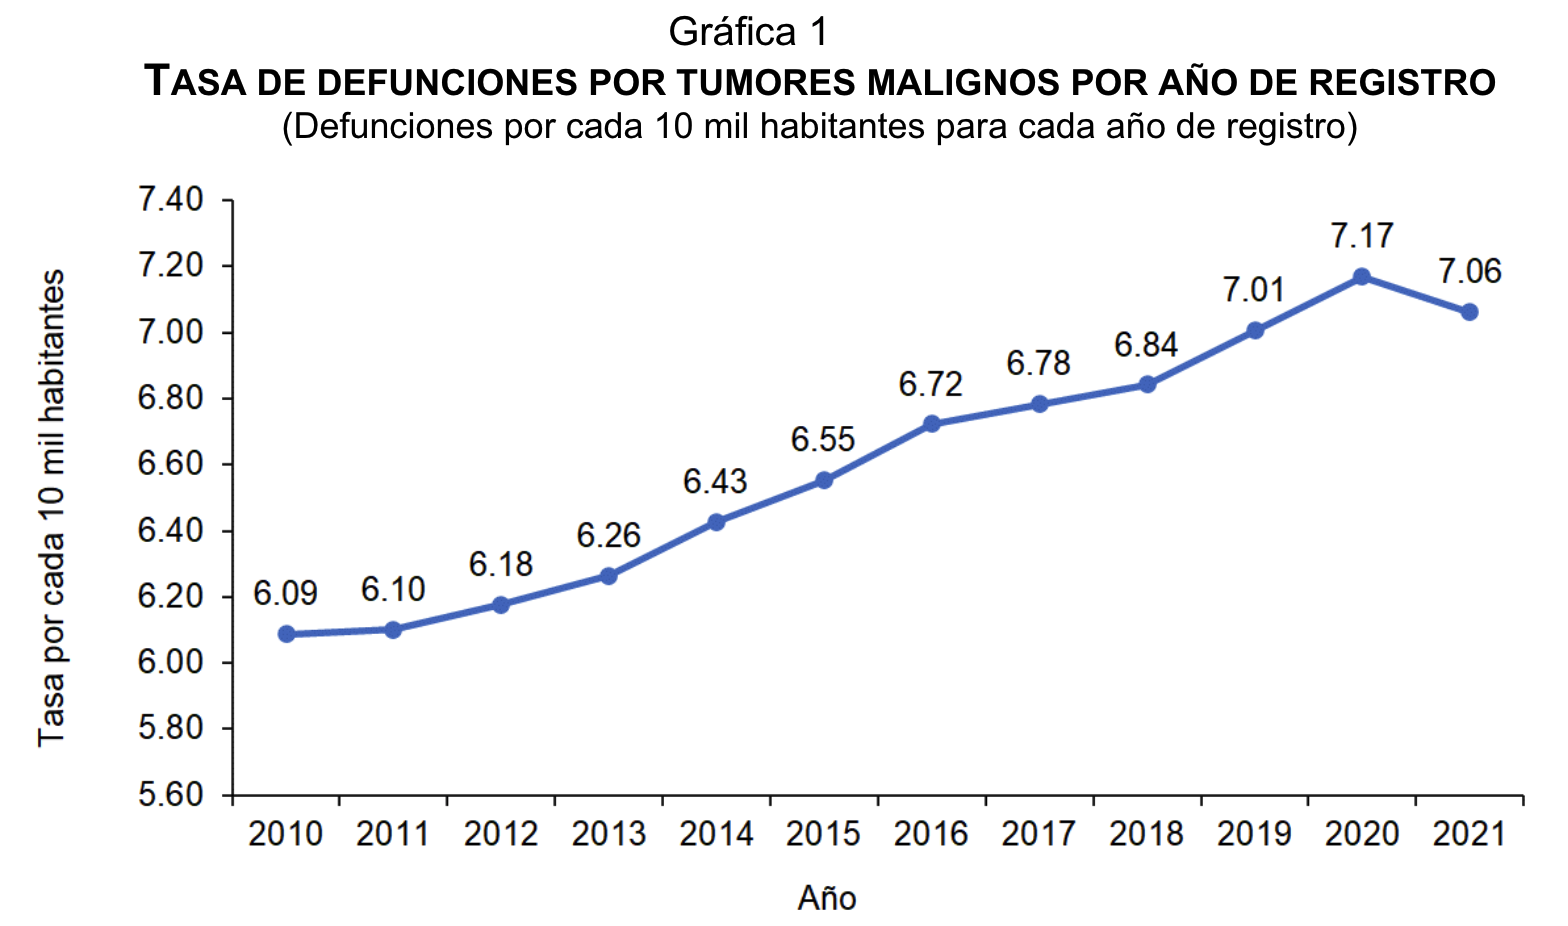

Ante esta problemática, la investigación científica se centra en desarrollar nuevos tratamientos y mejorar los existentes. Uno de los focos de atención es la proteína VEGF165 (Factor de Crecimiento Endotelial Vascular), la cual juega un papel crucial en la angiogénesis, el proceso de formación de nuevos vasos sanguíneos. En el contexto del cáncer, la sobreexpresión de VEGF165 promueve el crecimiento tumoral y la metástasis, haciendo de esta proteína un objetivo terapéutico atractivo.

El objetivo de este proyecto es desarrollar un modelo de IA capaz de identificar compuestos moleculares con alta eficiencia en la inhibición de VEGF165, lo que podría conducir al desarrollo de nuevos fármacos para el tratamiento del cáncer. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.

En esta etapa, se analizarán datos de la base de datos obtenida de la pagina Data of  Cancer Therapy Peptides, http://dctpep.cpu-bioinfor.org/, la cual contiene información sobre peptidos usados en terapias contra el cancer. El análisis exploratorio nos permitirá:

* Comprender la distribución de los datos: Identificar patrones, tendencias y valores atípicos en las variables relevantes para la inhibición de VEGF165.

* Descubrir relaciones entre las variables: Explorar posibles correlaciones entre las características del dataset.

* Identificar variables importantes: Seleccionar las variables más relevantes para el desarrollo del modelo de IA.

El análisis exploratorio de datos es fundamental para la construcción de un modelo de IA efectivo. Al comprender las características de los datos, podremos tomar decisiones informadas sobre las técnicas de preprocesamiento y modelado a aplicar en las etapas posteriores del proyecto.

Este proyecto tiene el potencial de contribuir significativamente a la lucha contra el cáncer, una enfermedad que afecta a millones de personas en todo el mundo, incluyendo México. El desarrollo de nuevos fármacos usando peptidos que inhiban la acción de VEGF165 y asi mejorar la eficacia de los tratamientos y ofrecer nuevas esperanzas a los pacientes.

In [3]:
###Start code here####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pd_cancer_db = pd.read_csv('../data/raw/peptide_library_all.csv')
pd_cancer_db.head(5)

,DCTPep_ID,DRAMP_ID,CancerPPD_ID,DBAASP_ID,Cppsite_ID,Peptide_Name,Sequence,Sequence_Length,UniProt_ID,PubChem_CID,...,Boman_Index,Half_Life,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm,Literature,Patent_ID,Patent_Title,Other_Information,Other_Published_ID
0,DCTPep00001,DRAMP02912,Not available,1485,Not available,SMAP-29,RGLRRLGRKIAHGVKKYGPTVLRIIRIA,28,Not available,16130512,...,-6364,Mammalian: 1 hour##Yeast: 2 min##E.coli: 2 min,125.36,1490,55.19,10601638++SMAP-29: a potent antibacterial and ...,Not available,Not available,Not available,Not available
1,DCTPep00002,Not available,Not available,Not available,Not available,CA-MA,KWKLFKKIGIGKFLHSAKKF,20,Not available,Not available,...,-1227,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,83.00,5500,289.47,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available
2,DCTPep00003,Not available,Not available,Not available,Not available,CA-MA3,KWKLFKKIGPGKFLHSAKKF,20,Not available,Not available,...,-1719,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,63.50,5500,289.47,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available
3,DCTPep00004,Not available,Not available,Not available,Not available,CA-MA1,KWKLFKKIKFLHSAKKF,17,Not available,Not available,...,-1907,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,74.71,5500,343.75,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available
4,DCTPep00005,Not available,Not available,Not available,Not available,CA-MA2,KWKLFKKIPKFLHSAKKF,18,Not available,Not available,...,-1907,Mammalian: 1.3 hour##Yeast: 3 min##E.coli: 2 min,70.56,5500,323.53,10675500++Effects of the hinge region of cecro...,Not available,Not available,Not available,Not available


In [16]:
pd_cancer_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DCTPep_ID                        6107 non-null   object 
 1   DRAMP_ID                         6107 non-null   object 
 2   CancerPPD_ID                     6107 non-null   object 
 3   DBAASP_ID                        6098 non-null   object 
 4   Cppsite_ID                       6107 non-null   object 
 5   Peptide_Name                     5876 non-null   object 
 6   Sequence                         6107 non-null   object 
 7   Sequence_Length                  6107 non-null   int64  
 8   UniProt_ID                       6107 non-null   object 
 9   PubChem_CID                      6107 non-null   object 
 10  Origin                           6067 non-null   object 
 11  Type                             6069 non-null   object 
 12  Hemolytic_Activity  

In [9]:
pd_cancer_db.describe()

,Sequence_Length,Mass,pI,Basic_residues,Acidic_residues,Net_charge,Polar_residues,Hydrophobic_residues,Hydrophobicity,Boman_Index,Aliphatic_Index,Extinction_Coefficient_cystines,Absorbance_280nm
count,6107.000000,6.107000e+03,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000
mean,17.314721,2.264222e+05,9.344870,4.203209,1.052890,3.150319,3.749304,6.157852,-32.957414,-3332.758638,85.402055,3750.612412,278.635115
std,9.884554,1.321152e+05,2.926218,3.487445,1.765759,3.663410,4.453515,4.145918,117.034008,4705.836340,58.691875,5254.834058,557.152633
min,2.000000,-5.760000e+02,3.170000,0.000000,0.000000,-9.000000,0.000000,0.000000,-450.000000,-37732.000000,0.000000,0.000000,0.000000
25%,10.000000,1.366115e+05,6.340000,1.000000,0.000000,0.000000,1.000000,3.000000,-99.000000,-5963.500000,43.330000,0.000000,0.000000
50%,15.000000,1.988900e+05,10.350000,4.000000,0.000000,3.000000,3.000000,6.000000,-32.500000,-1950.000000,78.000000,1490.000000,93.130000
75%,23.000000,3.018085e+05,11.650000,6.000000,1.000000,6.000000,5.000000,9.000000,44.480000,24.000000,123.330000,5625.000000,326.150000
max,97.000000,1.230031e+06,13.780000,35.000000,20.000000,35.000000,41.000000,40.000000,420.000000,19680.000000,390.000000,55000.000000,11000.000000
